In [1]:
import pandas as pd
import numpy as np
#import geopandas unused in playground notebook
%matplotlib inline
import matplotlib.pyplot as plt

The above code cell loads in the libraries needed for this Notebook.

In [3]:
# load the Courts and Rinks data set
Courts_Rinks = pd.read_csv("https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227")

In [4]:
Courts_Rinks.head(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.427925,-79.986011


Here is the first question: 
## What kind of sport would be the easiest to play with an alien?

In [5]:
print(Courts_Rinks["type"].unique())

['Basketball (Full)' 'Tennis' 'Basketball (Half)' 'General Sports'
 'Hockey' 'Dek Hockey' 'Pickleball' 'Lawn Bowling' 'Bocce' 'Volleyball'
 'Horseshoe Pit']


From these available rinks/courts we need to come up with a rational for which sport we want to play.

## Now we need to decide what earthly sport would be best suited to help befriend an alien...

- **Tennis** - Aliens could easily learn this sport, however aliens could be short and might have trouble hitting the ball over the net.

- **Hockey** - Aliens might have never experienced ice before, so putting them in a sport that requires interaction with ice might be overwhelming and stress out our alien.

- **Dek Hockey** - Aliens wouldn't have to learn how to skate or be afriad of ice however we want to choose a sport that is easy for aliens to learn and our alien might not be able to hold hockey stick.

- **Pickleball** - Most humans do not even know about pickleball so trying to teach an alien a sport we dont know will not work. 

- **Lawn Bowling** - Bowling might not be the best choice of sport when we are unsure about the number of fingers an alien would have. They might not be able to roll the bowling ball.

- **Bocce** - Like pickleball, Bocce is not very well known. It would be better to choose a sport that is more popular as it shows more cultural significance. 

- **Volleyball** - Volleyball requires a lot of height and also has many rules that would take a lot of time to explain.

- **Horseshoe** - Easy to explain, but we would like a more interactive and athletic sport for our alien. Also a sport with more cultural significance would be preferable. 

## What sport does that leave us? **Basketball.**

Basketball is pretty easy to explain. Ball goes in hoop. There are a few fouls that would need to be covered but in general this sport is one of the easiest to explain to our alien friends. There is also many different ways we could play instead of a normal game, like trying to play HORSE or just making free throws to enjoy a less intense version of the sport. Basketball is also really popular in many countries and would have good cultural significance. 

***


First, since we determined the best sport to play with an alien is basketball, lets **filter out** the sports that didn't make the cut! This way we can focus on only the basketball courts in Pittsburgh.

In [6]:
query_mask = Courts_Rinks['type'].str.contains("Basketball")

basketball = Courts_Rinks[query_mask]

basketball.head(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.427925,-79.986011
11,1120982972,Arsenal Basketball Court 1,Basketball (Full),Arsenal Park,NaN,Asphalt,0,f,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466928,-79.962253
17,1732101805,August Wilson Park Basketball Court 1,Basketball (Half),August Wilson Park,NaN,Asphalt,0,f,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446677,-79.985667
18,647954390,Banksville Park Basketball Court 1,Basketball (Full),Banksville Park,NaN,Asphalt,0,f,Banksville,2,20,42003202300,5,20,6,4-9,40.414840,-80.038695


Now that we filtered our data set down to only basketball courts, we can count the number of basketball courts in each neighborhood.

Below is a table of the top 10 neighborhoods that have the most basketball courts.

In [7]:
tally = basketball['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')

tally.head(10)

,neighborhood,counts
0,Beechview,6
1,South Side Slopes,5
2,Hazelwood,5
3,Beltzhoover,4
4,Squirrel Hill South,4
5,Terrace Village,4
6,Elliott,4
7,Sheraden,4
8,Greenfield,3
9,Spring Hill-City View,3


Here is a graph of the distribtutions of neighborhoods and how many courts they have. We can see that many neighborhoods have 1 court but only one neighborhood has 6 courts.

<AxesSubplot:xlabel='Number of Courts', ylabel='Number of Neighborhoods'>

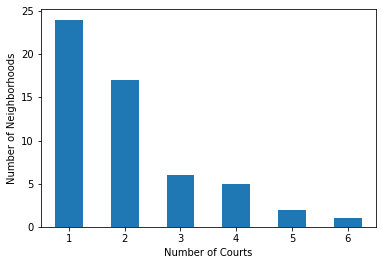

In [8]:
tally["counts"].value_counts().sort_index().plot(kind='bar', rot=0, xlabel = "Number of Courts", ylabel = "Number of Neighborhoods")

As shown in the table and the graph, we can see that according to the number of basketball courts in Pittsburgh, Beechview is the best neighborhood for befriending an alien!

In [9]:
# load Playgrounds data from WPRDC
playground_data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367",
                           index_col="id") # using id as row index

# random 5 rows to make sure it works
playground_data.sample(5)

,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
1892258603,Forbes and Braddock Playground,NaN,Parks - Eastern,Frick Park,BRADDOCK AVE,https://tools.wprdc.org/images/pittsburgh/play...,Regent Square,5,14,42003141000,3,14,4,2-16,40.439085,-79.898046
18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
289346967,Oakwood Playground,NaN,Parks - Western,Oakwood Park,DURBIN ST,https://tools.wprdc.org/images/pittsburgh/play...,Oakwood,2,28,42003562800,5,28,6,1-19,40.426045,-80.066946
1747939010,Four Mile Run Playground,NaN,Parks - Schenley,Four Mile Run Park,SALINE ST,https://tools.wprdc.org/images/pittsburgh/play...,Greenfield,5,14,42003151600,3,14,4,2-12,40.427891,-79.948700
1036798577,Schenley Anderson Playground,NaN,Parks - Schenley,Schenley Park,PANTHER HOLLOW RD,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.435664,-79.947295


The data for Playgrounds in Pittsburgh is downloaded directly from the WPRDC.

In order to ensure things have been loaded correctly, 5 random samples are taken from the dataset.

Since a table with 5 rows containing playground data was created, the data was downloaded properly.

In [10]:
# makes new dataframe of how many playgrounds are in each neigborhood
tally = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')

tally.head(10)

,neighborhood,counts
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Beltzhoover,4
4,Highland Park,4
5,Sheraden,4
6,Allegheny Center,4
7,East Liberty,3
8,Crawford-Roberts,3
9,Hazelwood,3


Next, a new dataset is created from the original data of Playgrounds in Pittsburgh. This new dataset, "tally," counts the amount of playgrounds within each neighborhood.

In the table above, the top 10 neighborhoods with the most playgrounds are shown.

Squirrel Hill South seems to be the definitive winner, with 8 playgrounds in total.

<AxesSubplot:ylabel='counts'>

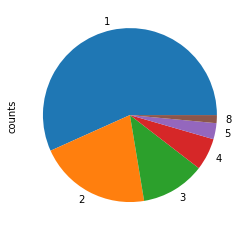

In [11]:
tally["counts"].value_counts().sort_index().plot.pie(y='counts', 
                                                  subplots=False, 
                                                  figsize=(8, 4))

To provide a visual of tally's collective data, this pie chart shows how many neighborhoods have a certain number of playgrounds. The majority of neighborhoods contain only 1 playground, with more playgrounds being sequentially rarer.

Taking only playground total into account, Squirrel Hill South appears to be the best neighborhood for befriending an alien.

Let's investigate what the art scene around Pittsburgh!

In [12]:
art_data = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151")
art_data

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1089921133,WM00099000,17th Ward Veterans Memorial,NaN,Non-City Owned,NaN,NaN,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428635,-79.980443
202,191395610,WM00101000,Saint Josephat Honor Roll,NaN,Non-City Owned,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-22,40.423129,-79.973486
203,628976107,WM00102000,World War II Momument,NaN,Non-City Owned,NaN,NaN,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,1-11,40.471780,-79.986670
204,1309894649,WM00105000,Korean War Veterans Memorial,R. Allan Christianson (Architect),War Memorials,Northshore Riverfront Park,NaN,North Shore,1.0,22.0,4.200398e+10,6.0,22.0,1.0,1-7,40.445726,-80.008082


This gives us the raw number of pieces of public art by neighborhood from most to least. It appears that the `Central Business District` and `Squirrel Hill South` dominate the list. 

In [13]:
neighborhood_art_count = art_data.groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by='count', ascending=False)
neighborhood_art_count

,neighborhood,count
9,Central Business District,27
47,Squirrel Hill South,22
0,Allegheny Center,18
42,South Side Flats,10
25,Highland Park,10
32,North Shore,8
3,Beechview,8
40,Shadyside,6
6,Brighton Heights,5
11,Central Oakland,5


<AxesSubplot:xlabel='neighborhood'>

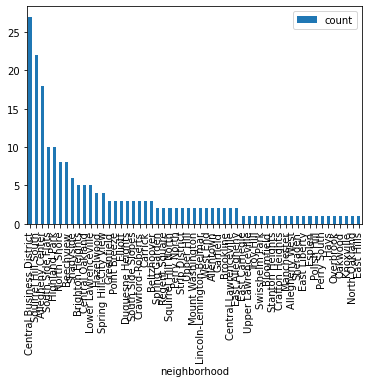

In [14]:
neighborhood_art_count.plot.bar(x='neighborhood', y='count')

This looks a little cramped. Let's try to filter out the neighborhoods with low numbers.

<AxesSubplot:xlabel='neighborhood'>

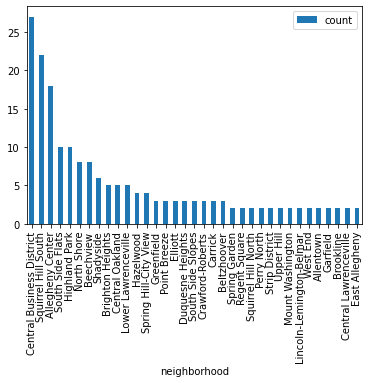

In [15]:
all_count_mask = neighborhood_art_count['count'] > 1
neighborhood_art_count[all_count_mask].plot.bar(x='neighborhood', y='count')

This still looks a little messy. Let's remove some more!

<AxesSubplot:xlabel='neighborhood'>

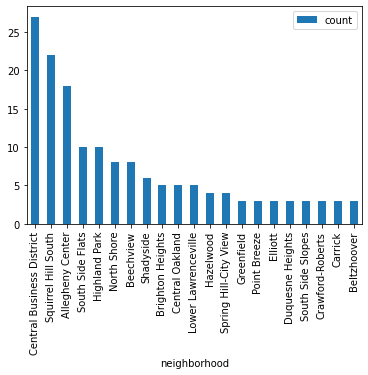

In [16]:
all_count_mask_2 = neighborhood_art_count['count'] > 2
neighborhood_art_count[all_count_mask_2].plot.bar(x='neighborhood', y='count')

That's better!

There are many different types of art that serve a particular purpose, so it can be difficult to choose what type of art an alien would enjoy. Let's look at what types are available.

In [17]:
neighborhood_art_types = art_data.groupby(by=['art_type'])['art_type'].count().reset_index(name='count').sort_values(by='count', ascending=False)
neighborhood_art_types

,art_type,count
2,Modern and Contemporary Art,68
4,War Memorials,57
1,Individual and Historic Monuments,40
0,Historic Art,23
3,Non-City Owned,12


While this gives us raw counts, let's compare the counts in a more visually pleasing way.

<AxesSubplot:xlabel='art_type'>

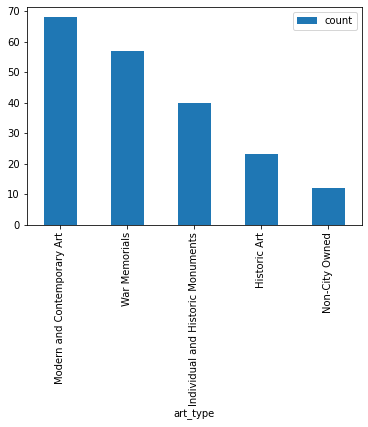

In [18]:
neighborhood_art_types.plot.bar(x='art_type',y='count')

It looks like historic artworks dominate the list. We have a few types to choose from, but what would be best for an alien? Modern and contemporary art may be confusing since it exists in a a social and emotional context that is alien (hehe) to them.

Since aliens are unfamiliar with Pittsburgh's history let alone America's history or the world's, I thought it would be nice to find some historically significant art. Since war is a significant human event, I include those in my filter.

In [19]:
historic_art_type_mask = art_data['art_type'].str.contains('Historic|War', na=False)
neighborhood_historic_art = art_data[historic_art_type_mask].groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by=['count', 'neighborhood'], ascending=False)
neighborhood_historic_art

,neighborhood,count
31,Squirrel Hill South,19
7,Central Business District,19
0,Allegheny Center,16
16,Highland Park,7
17,Lower Lawrenceville,5
9,Central Oakland,5
27,South Side Flats,4
4,Brighton Heights,4
1,Beechview,4
30,Spring Hill-City View,3


Looks like we have our winners! To the bar chart!

<AxesSubplot:xlabel='neighborhood'>

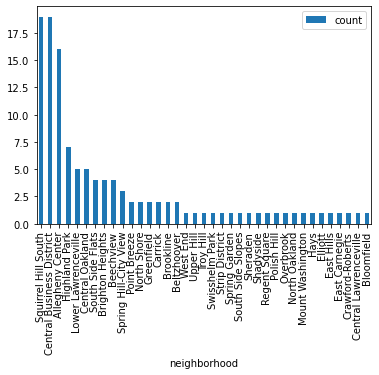

In [20]:
neighborhood_historic_art.plot.bar(x='neighborhood',y='count')

This looks a little crowded. Let's get rid of the neighborhoods with the lowest counts.

<AxesSubplot:xlabel='neighborhood'>

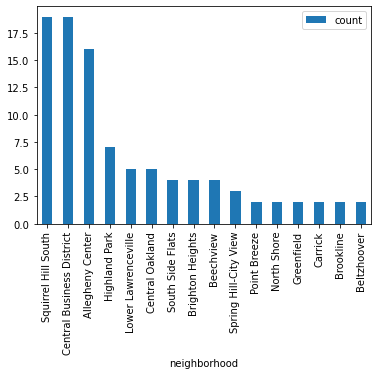

In [21]:
count_mask = neighborhood_historic_art['count'] > 1
neighborhood_historic_art[count_mask].plot.bar(x='neighborhood',y='count')

That's better! ENHANCE!

<AxesSubplot:xlabel='neighborhood'>

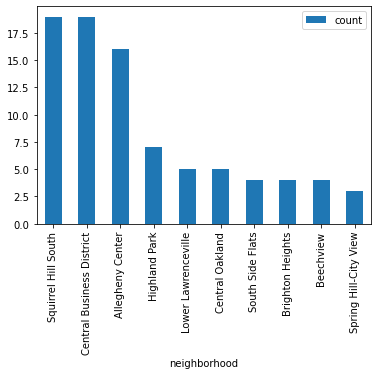

In [22]:
count_mask_2 = neighborhood_historic_art['count'] > 2
neighborhood_historic_art[count_mask_2].plot.bar(x='neighborhood',y='count')

In [23]:
modern_art_type_mask = art_data['art_type'].str.contains('Modern', na=False)
neighborhood_modern_art = art_data[modern_art_type_mask].groupby(by=['neighborhood'])['title'].count().reset_index(name='count').sort_values(by=['count', 'neighborhood'], ascending=False)
neighborhood_modern_art

,neighborhood,count
7,Central Business District,7
20,North Shore,6
25,Shadyside,5
26,South Side Flats,4
16,Hazelwood,4
29,Squirrel Hill South,3
17,Highland Park,3
21,Perry North,2
18,Lincoln-Lemington-Belmar,2
13,Elliott,2


It looks like there are a lot more historic pieces of art than modern pieces of art scattered across the city. Let's get a better view.

<AxesSubplot:xlabel='neighborhood'>

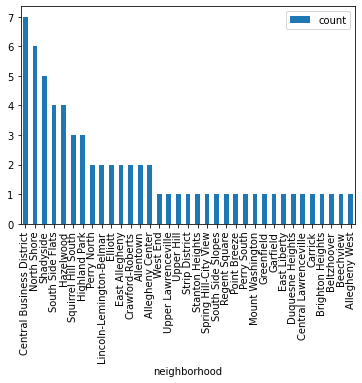

In [24]:
neighborhood_modern_art.plot.bar(x='neighborhood',y='count')

Why must there be so many neighborhoods! Anyway, let's do what we did last time by removing neighborhoods with only 1 row.

<AxesSubplot:xlabel='neighborhood'>

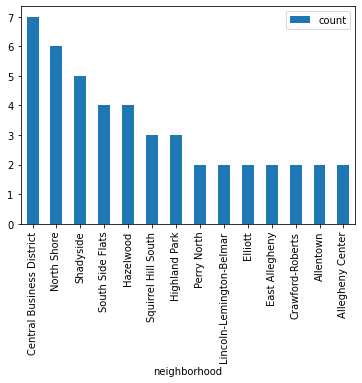

In [25]:
modern_art_count_mask = neighborhood_modern_art['count'] > 1
neighborhood_modern_art[modern_art_count_mask].plot.bar(x='neighborhood',y='count')

It looks like the `Central Business District` takes a commanding lead over `Squirrel Hill South` in the Modern Art department. Sure you could take an alien there to see some more modern art, but Downtown would be too overwhelming. You want to start off in a quieter place when you first meet. How are they supposed to land their spaceship Downtown? Parking there is a hot commodity.